In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results, X_TIMESTEPS
from math import ceil
from pathlib import Path

%matplotlib inline


In [2]:
# assert Path(log_dir + '/Monitor.csv').exists()

# plot_results([log_dir], 10e6, X_TIMESTEPS, "cakepizza")

In [3]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results_several_seeds_in_one_file(log_folder='./logs', steps_per_seed=1e6, title='Learning Curves'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x_all, y_all = ts2xy(load_results(log_folder), 'timesteps')

    if x_all[-1] >= steps_per_seed:
        pts_per_seed = np.where(x_all > steps_per_seed)[0][0] 
        n_seeds = ceil((len(x_all) - 20) / pts_per_seed)
    else:
        pts_per_seed = len(x_all)
        n_seeds = 1
    print('#seeds = {}'.format(n_seeds))
    fig = plt.figure(title, figsize = (10, 4))
    for i in range(n_seeds):
        x = x_all[i*pts_per_seed:(i+1)*pts_per_seed]
        y = y_all[i*pts_per_seed:(i+1)*pts_per_seed]
        y_smoothed = moving_average(y, window=200)
        # Truncate x
        x = x[len(x) - len(y_smoothed):] - min(x)
        y = y[len(y) - len(y_smoothed):]
        plt.plot(x, y_smoothed)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Total reward')
    plt.title(title + " (Smoothed)")
    plt.show()

    
def plot_multiple_runs(log_folder, title='Learning Curves'):
    fig = plt.figure(title, figsize = (10, 4))
    paths = Path(log_folder).iterdir()
    for path in paths:
        #print(int(str(path)[-1]))
        x, y = ts2xy(load_results(path), 'timesteps')
        y_smoothed = moving_average(y, window=2000)
        # Truncate x
        x = x[len(x) - len(y_smoothed):]
        y = y[len(y) - len(y_smoothed):]
        plt.plot(x, y_smoothed, label='seed ' + str(path)[-1])
    plt.legend()
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Total reward')
    plt.title(title + " (Smoothed)")
    plt.show()

In [4]:
# plot_results_several_seeds_in_one_file(log_folder=log_dir, steps_per_seed=10e6)

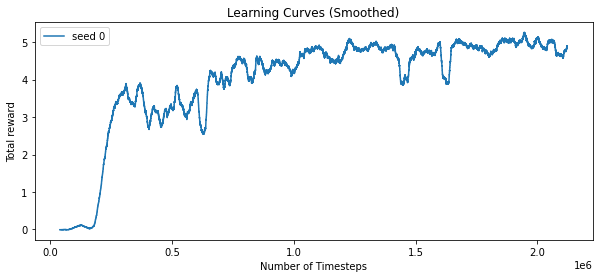

In [5]:
experiment_folder = Path("~/assistance-logs").expanduser()
assert experiment_folder.exists()
plot_multiple_runs(experiment_folder)

In [ ]:
log_dir = "../../remote-logs"
Path(log_dir).mkdir(parents=True, exist_ok=True)
experiment_name = 'pie_small/'
experiment_folder = log_dir + '/' + experiment_name
assert Path(experiment_folder).exists()
plot_multiple_runs(experiment_folder)

In [ ]:
log_dir = "../../logs"
Path(log_dir).mkdir(parents=True, exist_ok=True)
experiment_name = 'pie_small/'
experiment_folder = log_dir + '/' + experiment_name
assert Path(experiment_folder).exists()
plot_multiple_runs(experiment_folder)